# Video Game Sales
- https://www.kaggle.com/gregorut/videogamesales
- https://www.kaggle.com/snanilim/video-games-sales-analysis-and-visualization

<div><p>This dataset contains a list of video games with sales greater than 100,000 copies.  It was generated by a scrape of <a href="http://www.vgchartz.com/" target="_blank">vgchartz.com</a>.</p>
<p>Fields include</p>
<ul>
<li><p>Rank - Ranking of overall sales</p></li>
<li><p>Name - The games name</p></li>
<li><p>Platform - Platform of the games release (i.e. PC,PS4, etc.)</p></li>
<li><p>Year - Year of the game's release</p></li>
<li><p>Genre - Genre of the game</p></li>
<li><p>Publisher - Publisher of the game</p></li>
<li><p>NA_Sales - Sales in North America (in millions)</p></li>
<li><p>EU_Sales - Sales in Europe (in millions)</p></li>
<li><p>JP_Sales - Sales in Japan (in millions)</p></li>
<li><p>Other_Sales - Sales in the rest of the world (in millions)</p></li>
<li><p>Global_Sales - Total worldwide sales.</p></li>
</ul>
<p>The script to scrape the data is available at <a href="https://github.com/GregorUT/vgchartzScrape" target="_blank">https://github.com/GregorUT/vgchartzScrape</a>.<br>
It is based on BeautifulSoup using Python.<br>
There are 16,598 records.  2 records were dropped due to incomplete information.</p></div>

## 載入與整理資料

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 Seaborn 的顯示樣式  https://seaborn.pydata.org/generated/seaborn.set_style.html
sns.set_style('whitegrid')

data = pd.read_excel("input/vgsales.xlsx")
data.head()

#data.shape() #查看資料筆數跟欄位數目 16598 row & 11 col
#data.info()  #檢查資料欄位的型態，以及缺失狀況
#data.describe()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
# 年份的格式錯誤，所以需要更改成整數型態
data.isnull().sum()                           #Pandas DataFrame 計算 N/A 出現次數的方法
data['Year'].replace(np.nan, 0, inplace=True) #因為整數沒有 N/A，所以需要先將 N/A 改成 0
data['Year'] = data['Year'].astype('int32')   #改變資料型態
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2.0,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3.0,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4.0,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5.0,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# 查看其他非數值型欄位的統計值
data.describe(include=['object', 'bool'])

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


## CountPlot 統計

### 最受歡迎的電玩類型 (Genre)

In [4]:
data['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='count'>

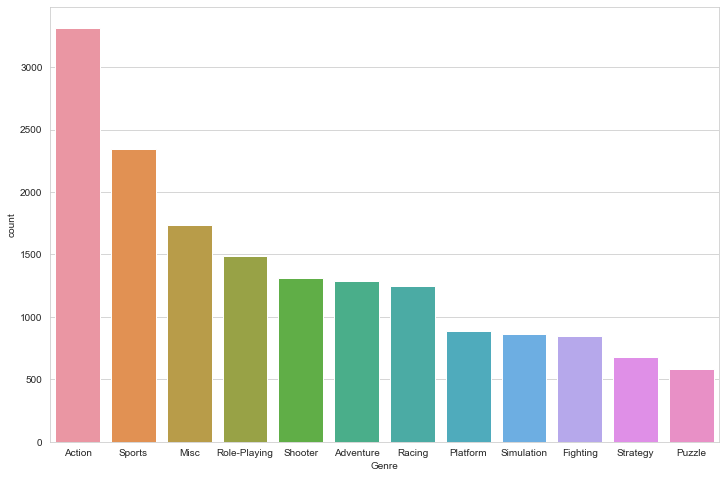

In [5]:
plt.figure(figsize=(12, 8)) #設定圖表的大小
sns.countplot(x="Genre", 
              data=data, 
              order = data['Genre'].value_counts().index) #排序

### 哪年發表的遊戲數最多 (Year)

<AxesSubplot:xlabel='Year', ylabel='count'>

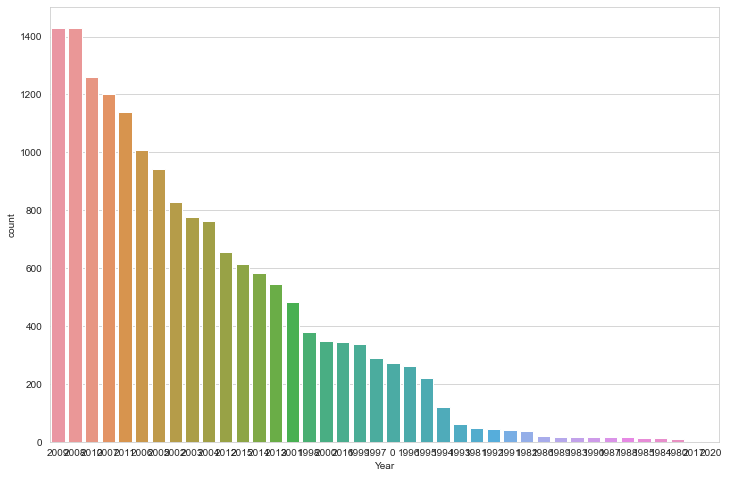

In [6]:
plt.figure(figsize=(12, 8))
sns.countplot(x="Year", 
              data=data, 
              order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
#plt.xticks(rotation=90)

### 銷售最佳前五年，各種類電玩的數目

<AxesSubplot:xlabel='Year', ylabel='count'>

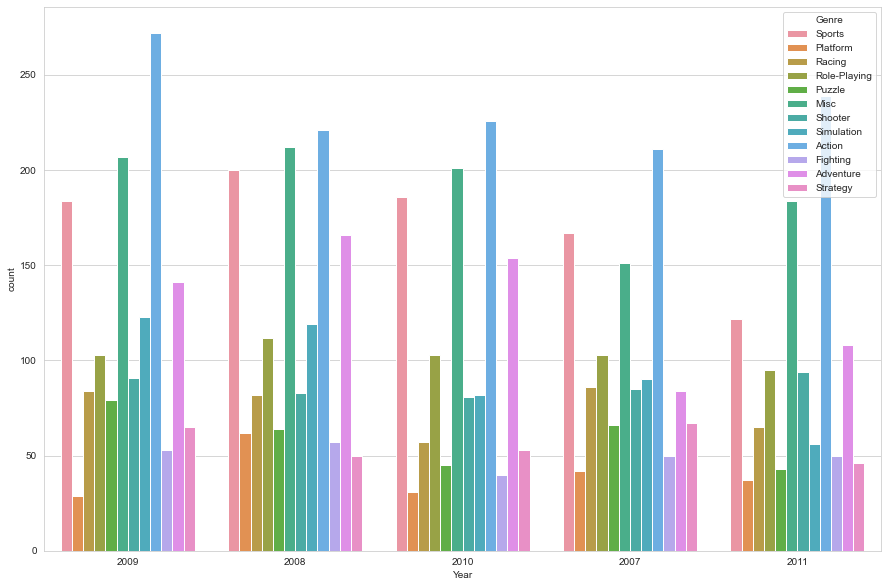

In [7]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year",
              data=data, 
              hue='Genre',
              order=data.Year.value_counts().iloc[:5].index ) #只取出前五名

## Groupb 每年銷售狀況

### 計算每一年的全球總銷量

In [8]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum() 
data_year = data_year.reset_index()  #重設索引變成欄位
data_year.head()

,Year,Global_Sales
0,0,100.08
1,1980,11.38
2,1981,35.77
3,1982,28.86
4,1983,16.79


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

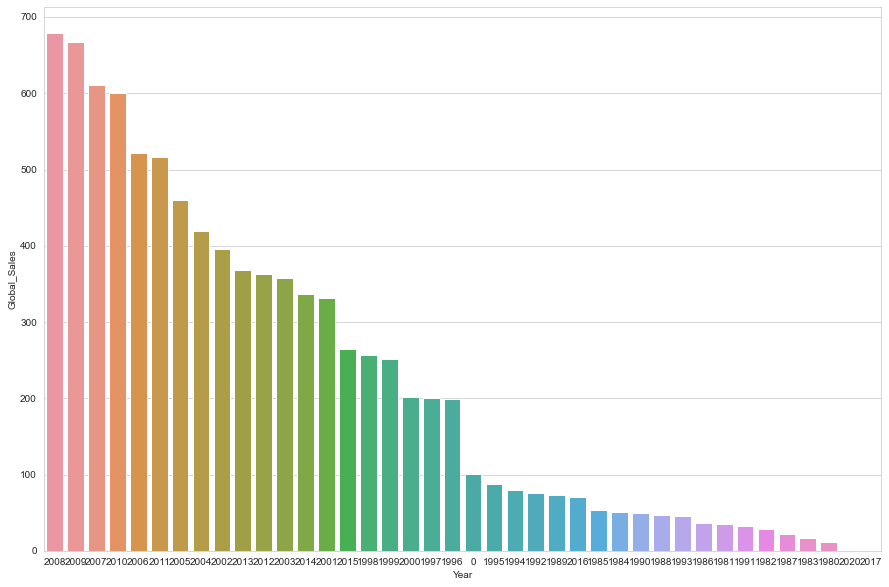

In [9]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year, 
            order=data_year.sort_values(by='Global_Sales', ascending=False).Year)
#plt.xticks(rotation=90)

### 每年哪個種類的發行數目最多？

In [10]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)

#因為每年可能會有不同類型的遊戲發行數目一樣，所以去除重複的
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
year_max_genre.head()

,Year,Genre,count
0,0,Action,63
1,1980,Misc,4
2,1981,Action,25
3,1982,Action,18
4,1983,Action,7


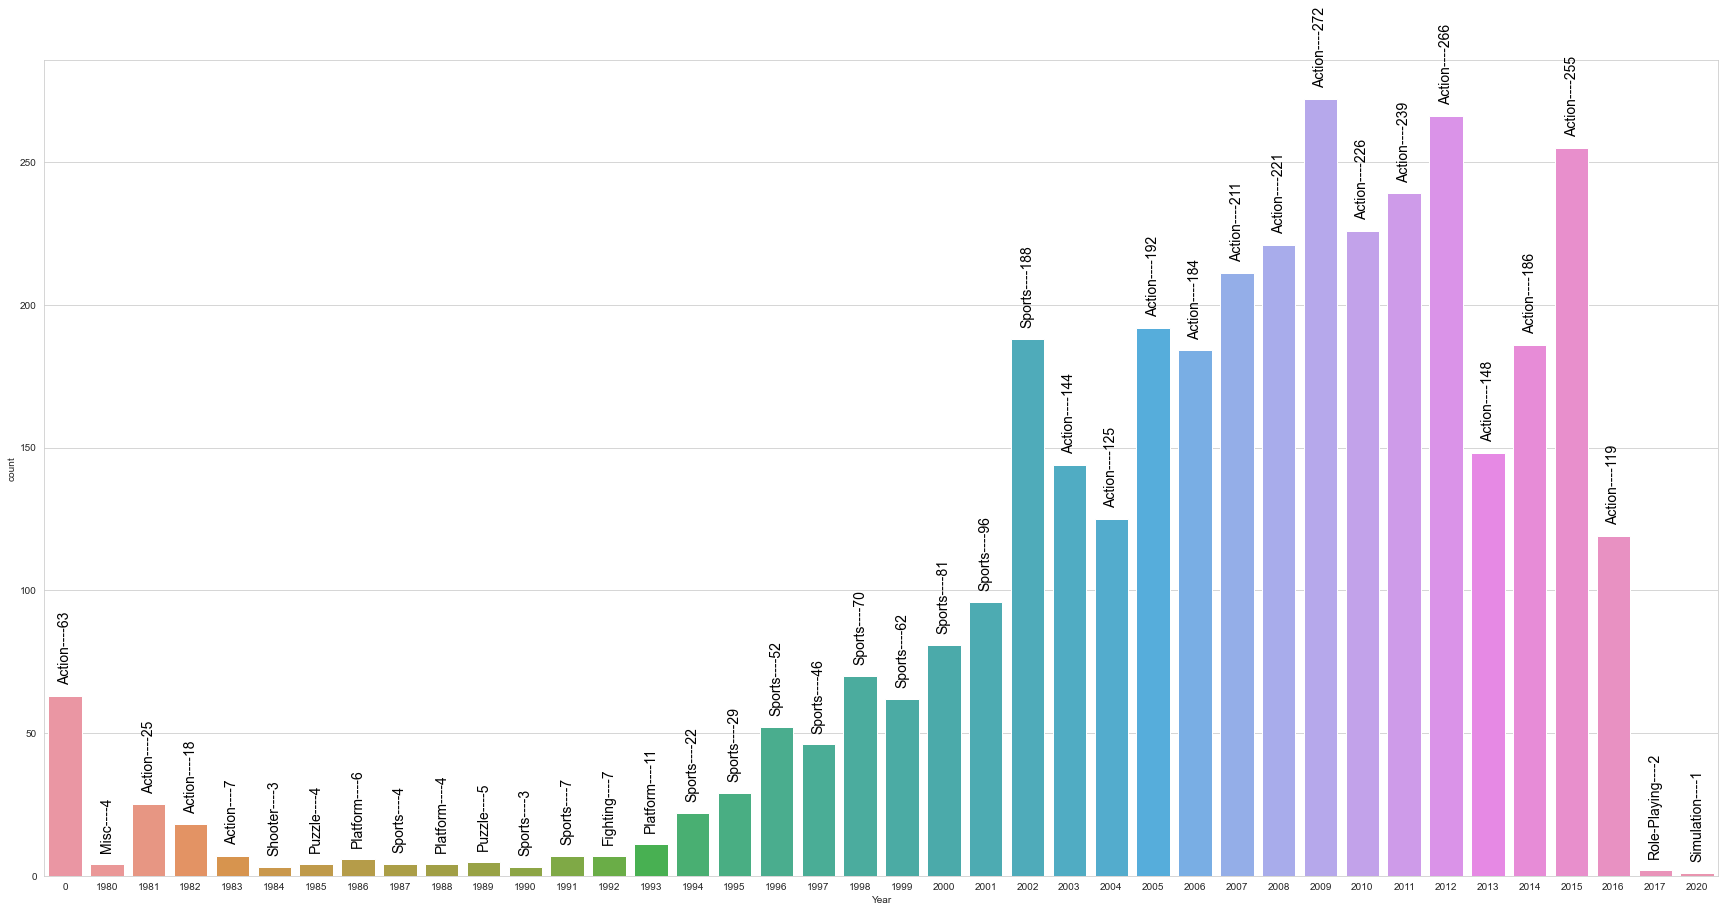

In [11]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)

#標示出每個直條代表的類型跟數目
genre = year_max_genre['Genre'].values
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1


### 每年哪種類型的銷售數量最多？

In [12]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
year_sale_max.head()

,Year,Genre,Global_Sales
0,0,Action,28.30
1,1980,Shooter,7.07
2,1981,Action,14.84
3,1982,Puzzle,10.03
4,1983,Platform,6.93


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, '0'),
  Text(1, 0, '1980'),
  Text(2, 0, '1981'),
  Text(3, 0, '1982'),
  Text(4, 0, '1983'),
  Text(5, 0, '1984'),
  Text(6, 0, '1985'),
  Text(7, 0, '1986'),
  Text(8, 0, '1987'),
  Text(9, 0, '1988'),
  Text(10, 0, '1989'),
  Text(11, 0, '1990'),
  Text(12, 0, '1991'),
  Text(13, 0, '1992'),
  Text(14, 0, '1993'),
  Text(15, 0, '1994'),
  Text(16, 0, '1995'),
  Text(17, 0, '1996'),
  Text(18, 0, '1997'),
  Text(19, 0, '1998'),
  Text(20, 0, '1999'),
  Text(21, 0, '2000'),
  Text(22, 0, '2001'),
  Text(23, 0, '2002'),
  Text(24, 0, '2003'),
  Text(25, 0, '2004'),
  Text(26, 0, '2005'),
  Text(27, 0, '2006'),
  Text(28, 0, '2007'),
  Text(29, 0, '2008'),
  Text(30, 0, '2009'),
  Text(31, 0, '2010'),
  Text(32, 0, '2011'),
  Text(33, 0, '2012'),
  Text(34, 0, '2013'),
  Text(35, 0, '2014'),

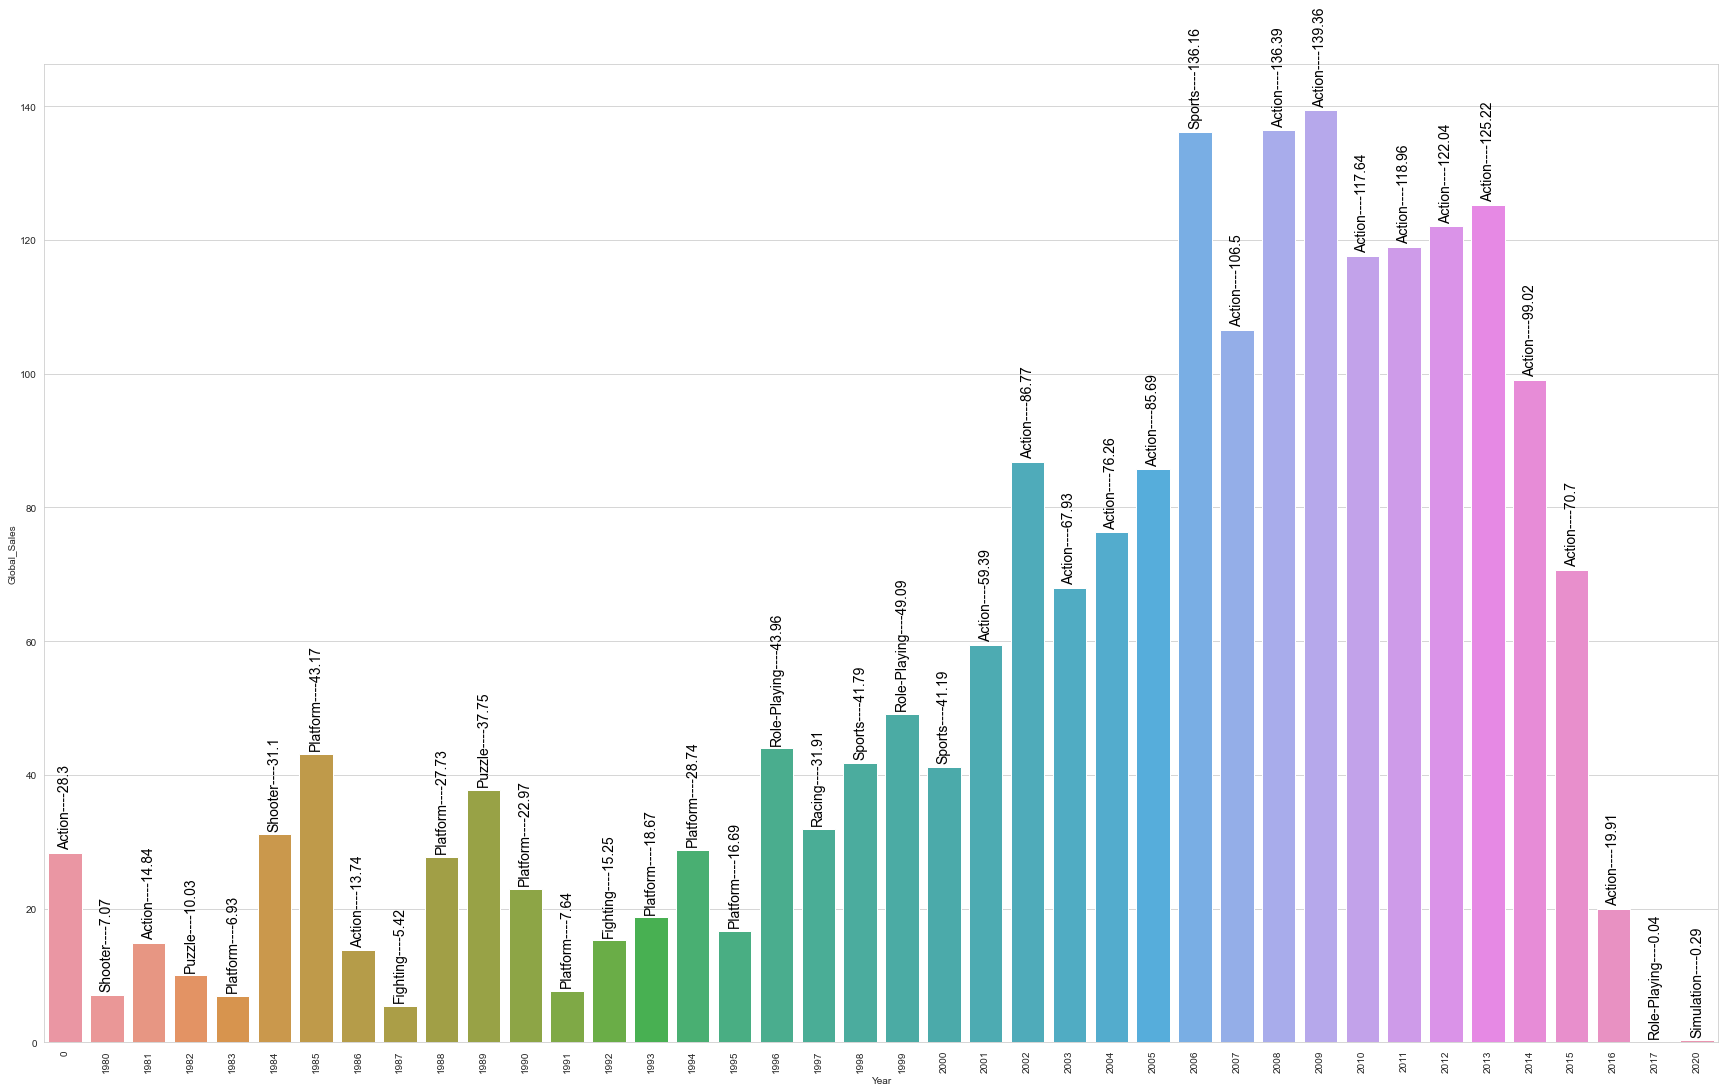

In [13]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)

genre = year_sale_max['Genre']
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, 
           str(genre[index] + '----' +str(round(value, 2))), # round() 四捨五入到指定的小數位
           color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)

### 哪一種類型銷售總數量最高？

In [14]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
data_genre.head()

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37


<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

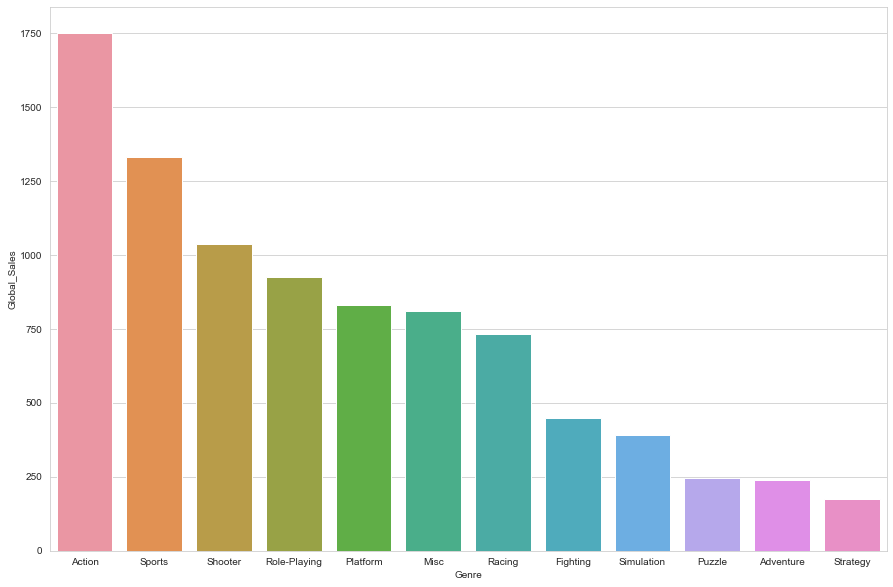

In [15]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)

### 哪一個平台的遊戲全球銷售總數量最高？

In [16]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
data_platform.head()

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49


<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

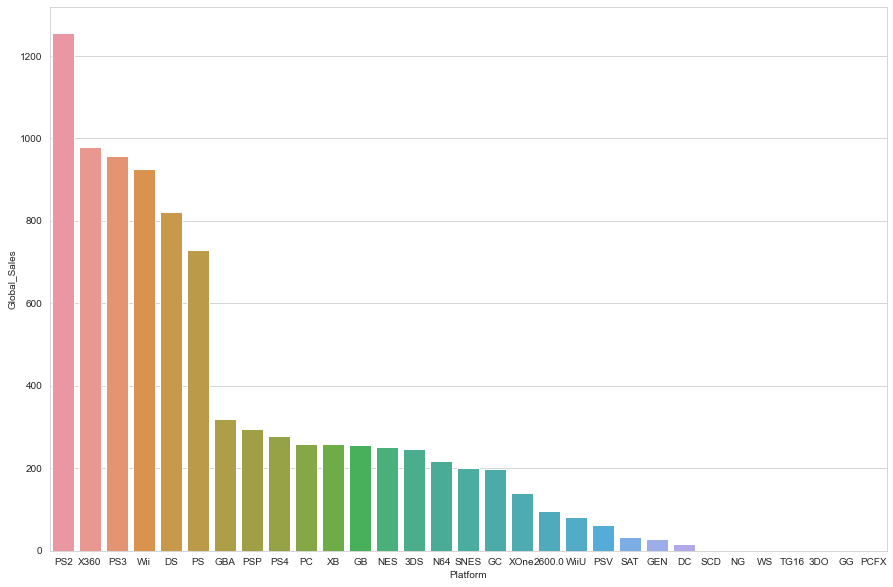

In [17]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)

### 全球銷售數量前20大遊戲

In [18]:
top_game_sale = data.head(20) #直接取前20筆
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
top_game_sale.head()

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006,Sports,82.74
1,Super Mario Bros.,1985,Platform,40.24
2,Mario Kart Wii,2008,Racing,35.82
3,Wii Sports Resort,2009,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,31.37


Text(0.5, 0, 'Release Year')

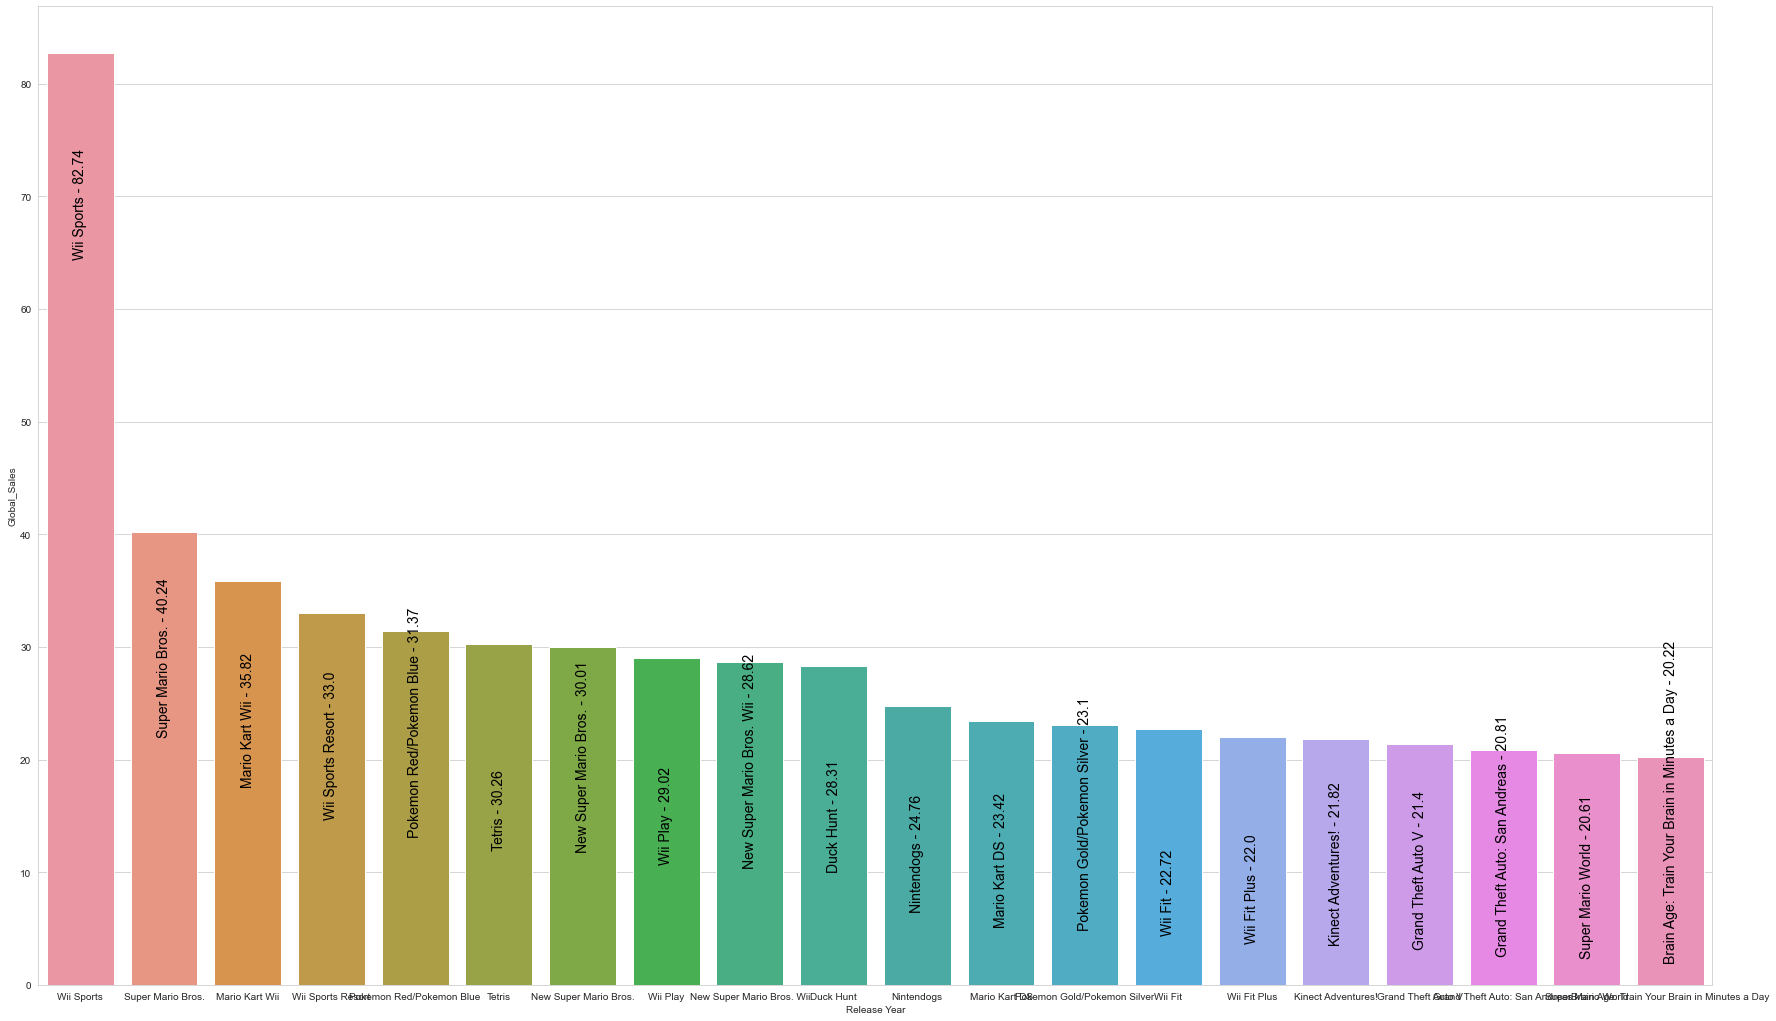

In [19]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index]+' - '+str(value), color='#000', size=14, rotation= 90, ha="center")
    index += 1
    
plt.xlabel('Release Year')
#plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
#plt.show()

### 比較各區域不同遊戲種類的銷售數量

In [20]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_genre.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Sports,41.49,29.02,3.77,8.46
1,Platform,29.08,3.58,6.81,0.77
2,Racing,15.85,12.88,3.79,3.31
3,Sports,15.75,11.01,3.28,2.96
4,Role-Playing,11.27,8.89,10.22,1.00


In [21]:
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_map.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Adventure,105.80,64.13,52.07,16.81
Fighting,223.59,101.32,87.35,36.68
Misc,410.24,215.98,107.76,75.32
Platform,447.05,201.63,130.77,51.59


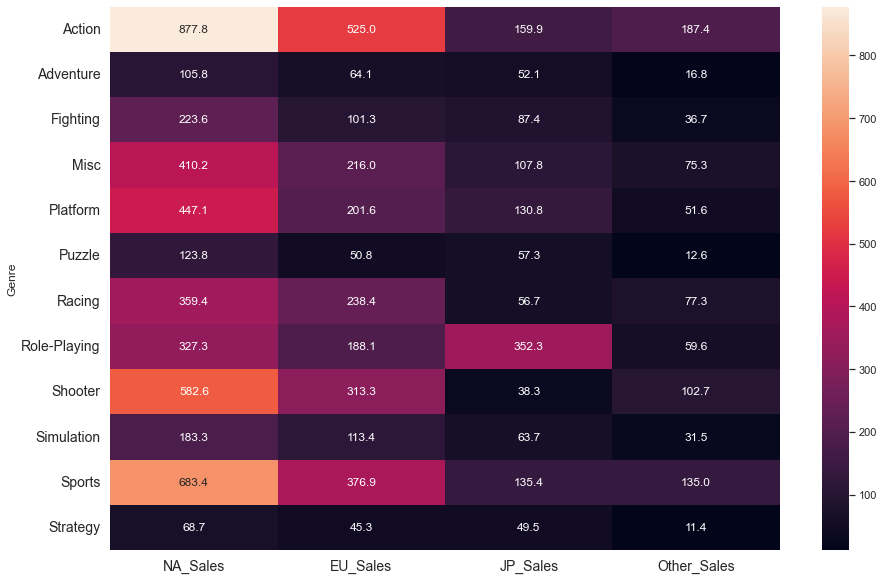

In [22]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1) #設定字型的縮放比例
sns.heatmap(comp_map, annot=True, fmt = '.1f') #熱圖
plt.xticks(fontsize=14) #X座標字型
plt.yticks(fontsize=14) #Y座標字型
plt.show()

In [23]:
comp_table = comp_map.reset_index()
# pd.melt會將一個DataFrame拆解 key=欄位名稱, value=欄位值
comp_table = pd.melt(comp_table, id_vars=['Genre'], 
                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,877.83
1,Adventure,NA_Sales,105.80
2,Fighting,NA_Sales,223.59
3,Misc,NA_Sales,410.24
4,Platform,NA_Sales,447.05


<AxesSubplot:xlabel='Genre', ylabel='Sale_Price'>

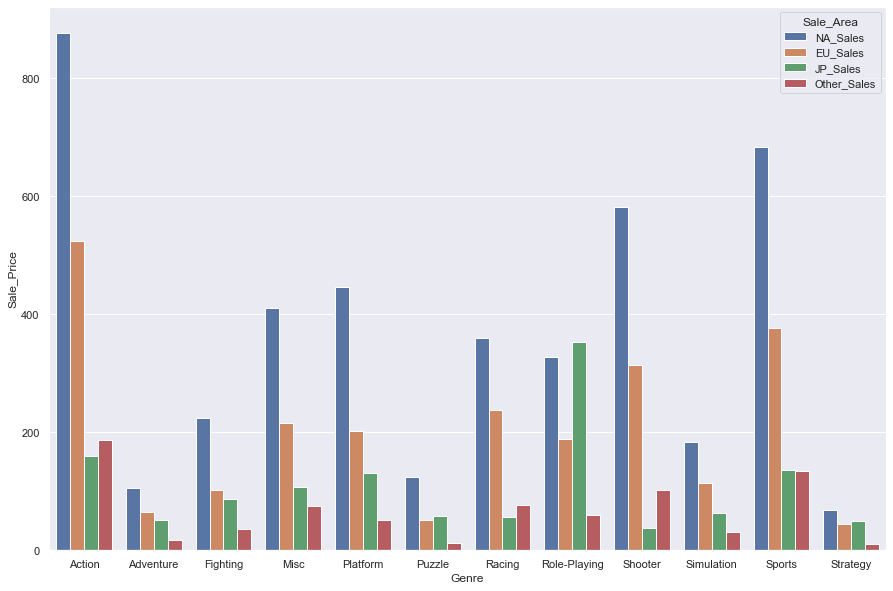

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

### 比較各區域不同遊戲平台的銷售數量

In [25]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2600.0,90.60,5.47,0.00,0.91
1,3DO,0.00,0.00,0.10,0.00
2,3DS,78.87,58.52,97.35,12.63
3,DC,5.43,1.69,8.56,0.27
4,DS,390.71,194.65,175.57,60.53


In [26]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_platform, 
                     id_vars=['Platform'], 
                     value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                     var_name='Sale_Area', 
                     value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600.0,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.87
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.71


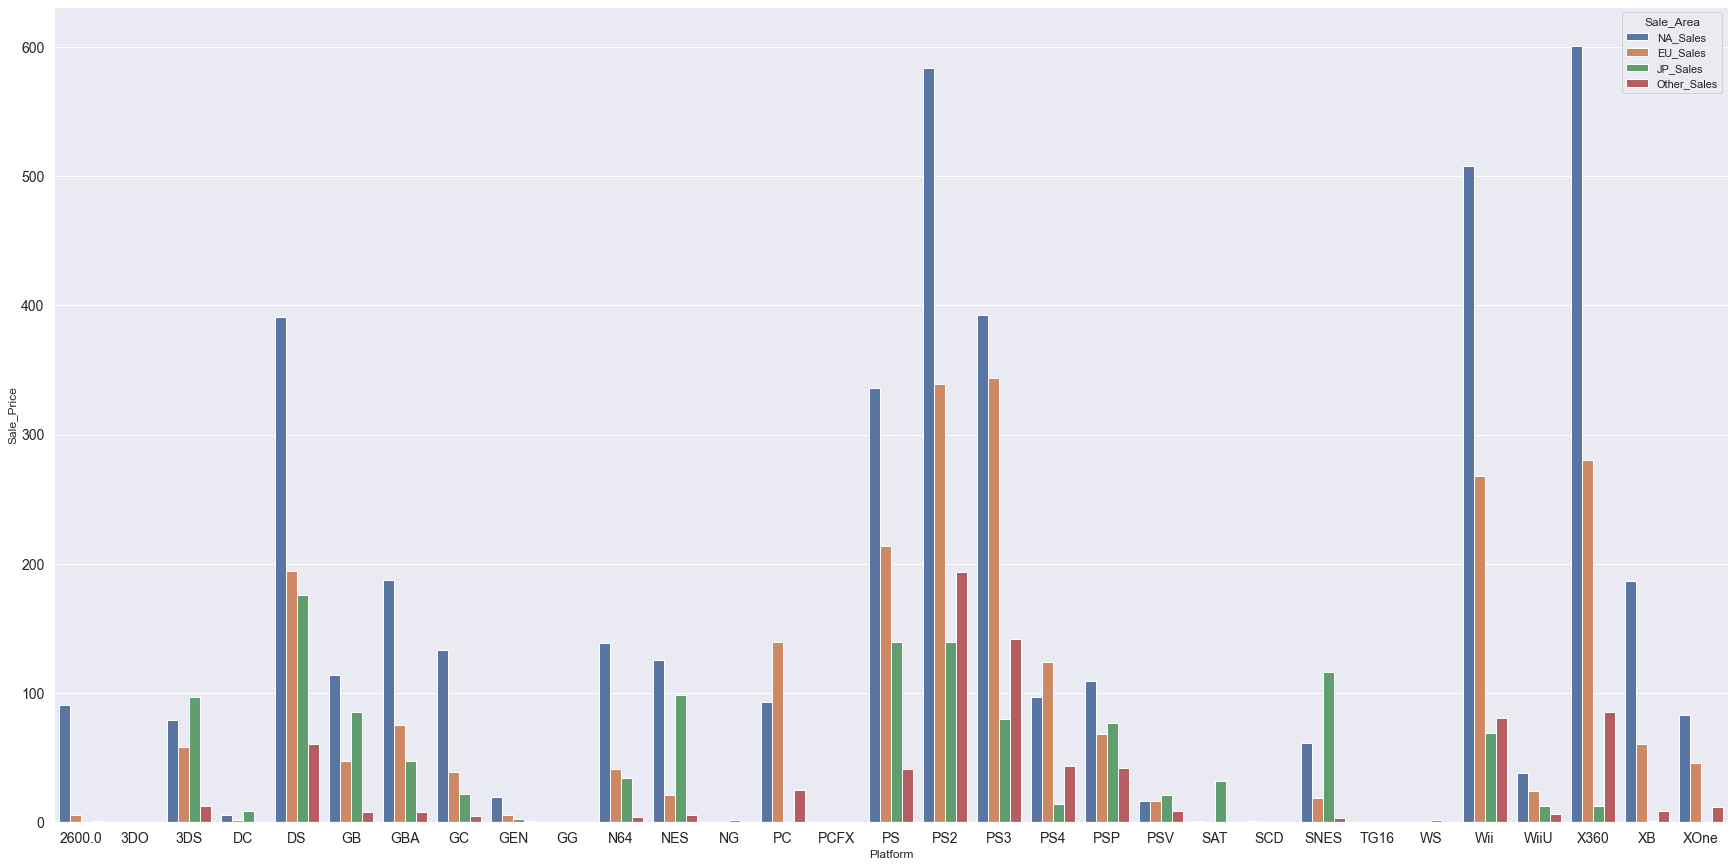

In [27]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', 
            y='Sale_Price', 
            hue='Sale_Area', 
            data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### 列出每個開發商的遊戲數目，與前20大開發商

In [28]:
top_publisher = data.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
top_publisher.head()

,Publisher,Name
0,Electronic Arts,1351
1,Activision,975
2,Namco Bandai Games,932
3,Ubisoft,921
4,Konami Digital Entertainment,832


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Unknown'),
  Text(17, 0, 'Eidos Interactive'),
  Text(18, 0, 'Midway Games'),
  Text(19, 0, '505 Games')])

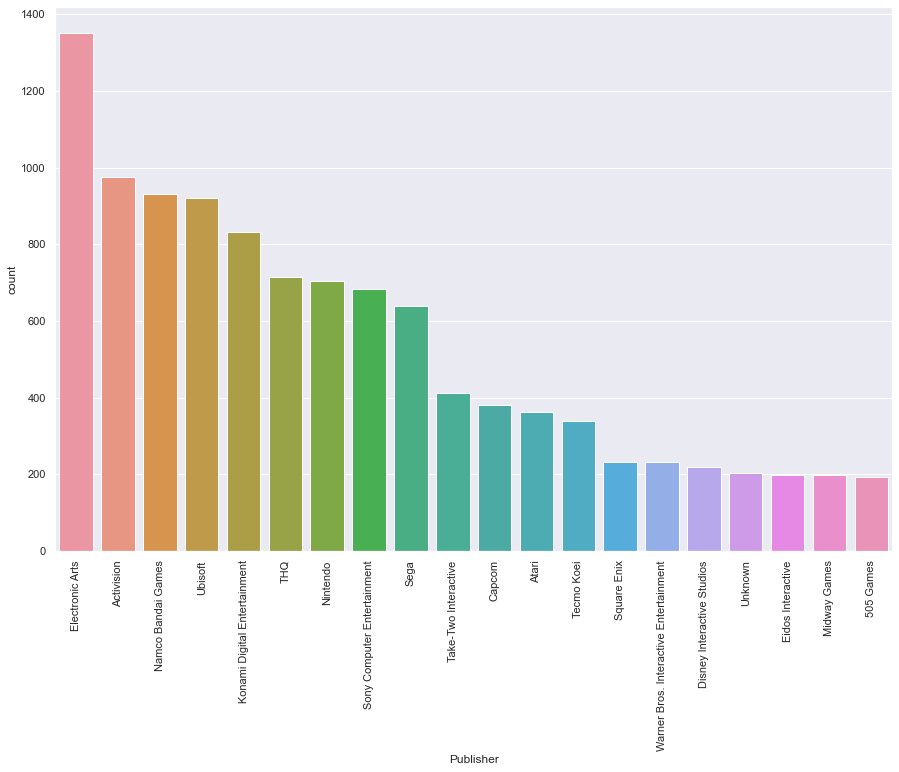

In [29]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", 
              data=data, 
              order = data.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

### 各遊戲發行商的全球銷售總數量

In [30]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
sale_pbl.head()

,Publisher,Global_Sales
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

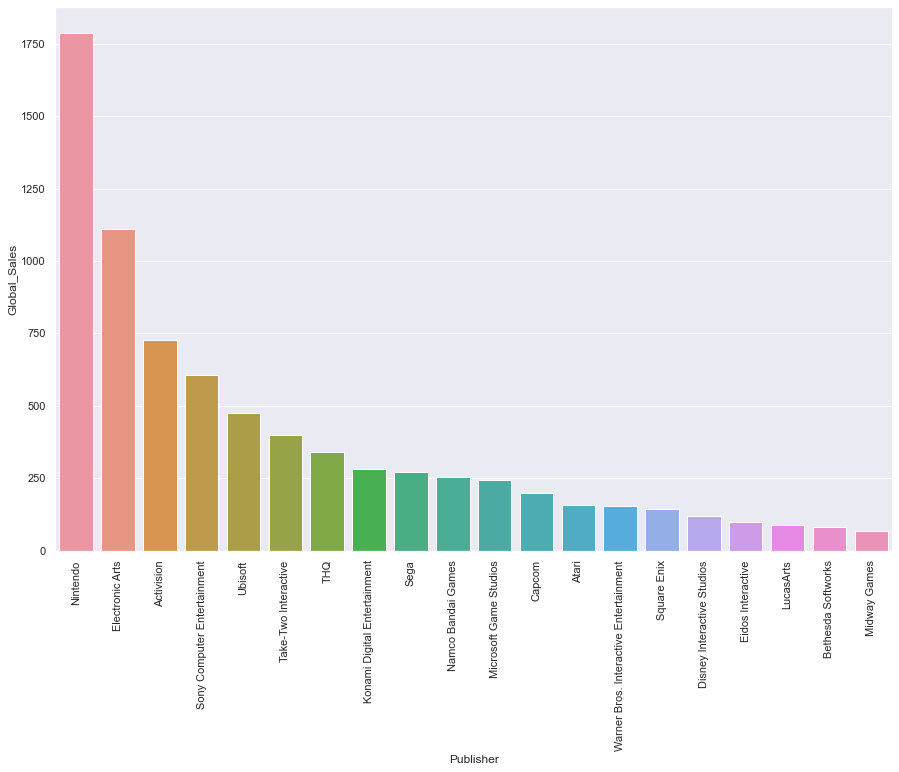

In [31]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

### 各遊戲廠商在不同區域的銷售總數量

In [32]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [33]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], 
                         value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                         var_name='Sale_Area', value_name='Sale_Price')

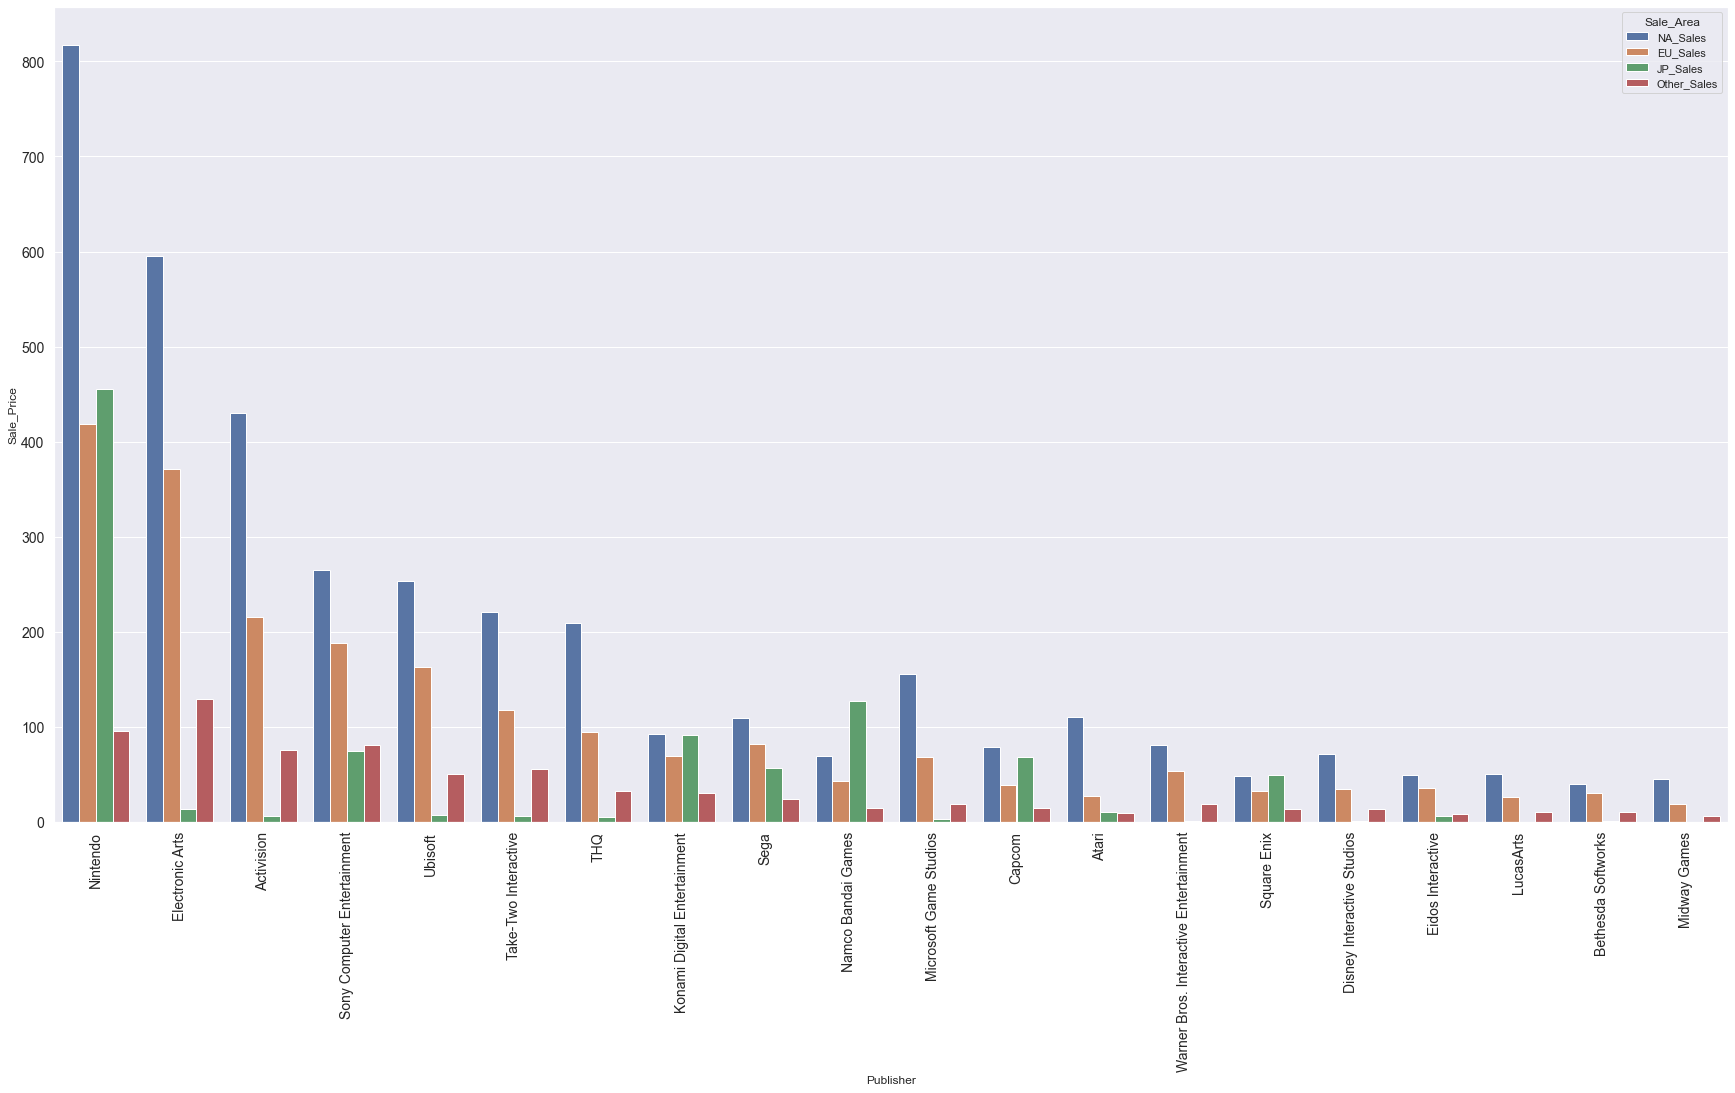

In [34]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

### 每年遊戲數目最多的開發商

In [35]:
top_publisher =  data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
top_publisher_count.head()

,Year,Publisher,Count
0,0,Unknown,103
1,1980,Activision,5
2,1981,Atari,11
3,1982,Atari,14
4,1983,Nintendo,6


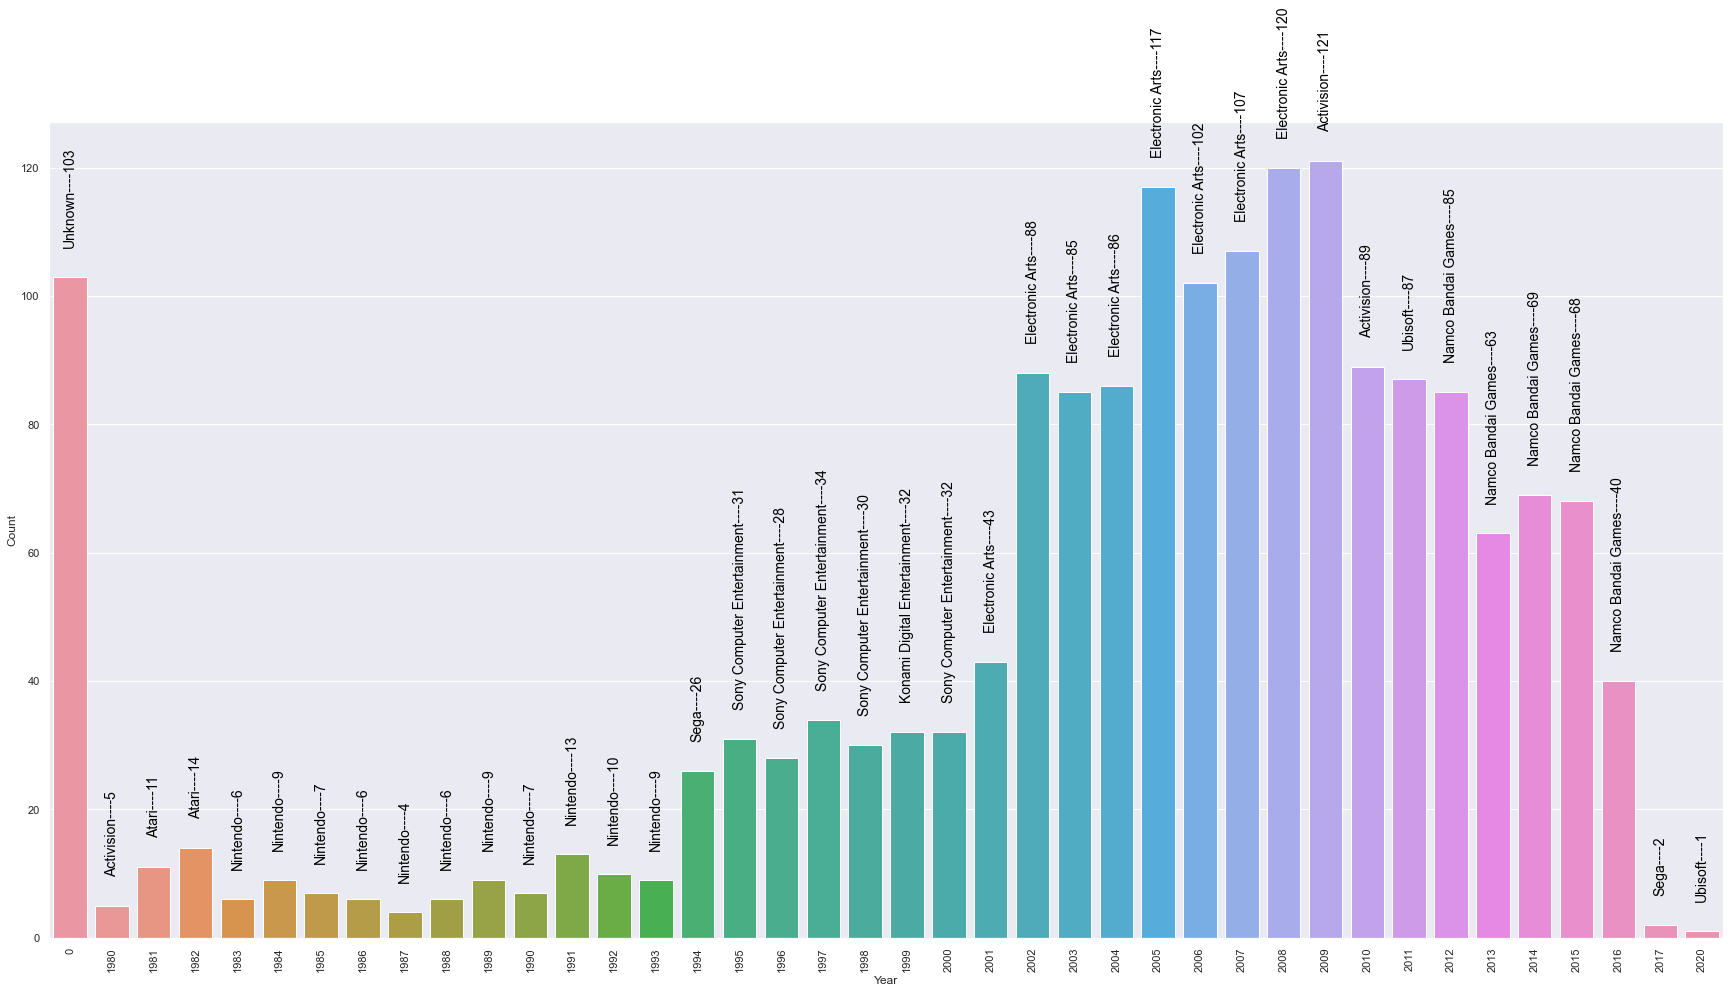

In [36]:
publisher= top_publisher_count['Publisher']
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

## 各區域遊戲的銷售總量

In [37]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


<AxesSubplot:xlabel='region', ylabel='sale'>

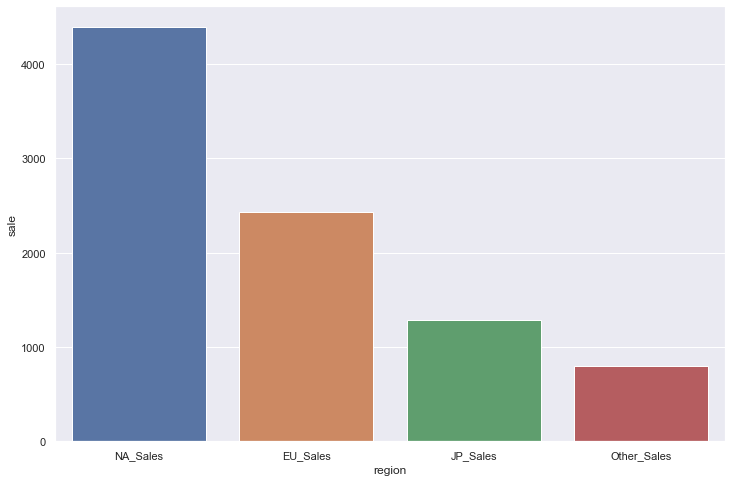

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

([<matplotlib.patches.Wedge at 0x221e5cbc3a0>,
 [Text(-1.0997117266962277, 0.025181703016309925, 'NA_Sales'),
  Text(0.7981571088480199, -0.7569314563389279, 'EU_Sales'),
  Text(0.935642530069744, 0.5784229040457237, 'JP_Sales'),
  Text(0.3051488492741687, 1.0568274124882695, 'Other_Sales')],
 [Text(-0.5998427600161241, 0.013735474372532685, '49.3%'),
  Text(0.4353584230080108, -0.412871703457597, '27.3%'),
  Text(0.510350470947133, 0.3155034022067583, '14.5%'),
  Text(0.16644482687681925, 0.5764513159026924, '8.9%')])

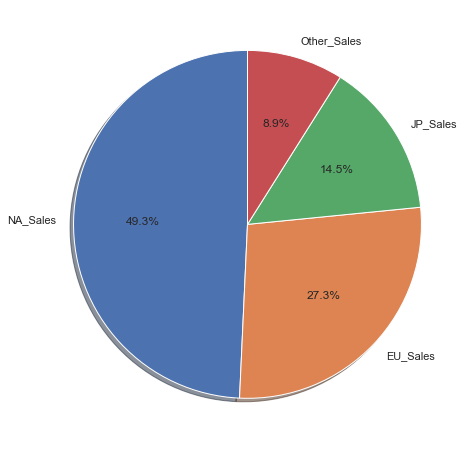

In [39]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

## 欄位間的相關值
- 日本市場的喜好跟歐美不同
- 歐洲市場跟北美市場的喜好差不多

<AxesSubplot:>

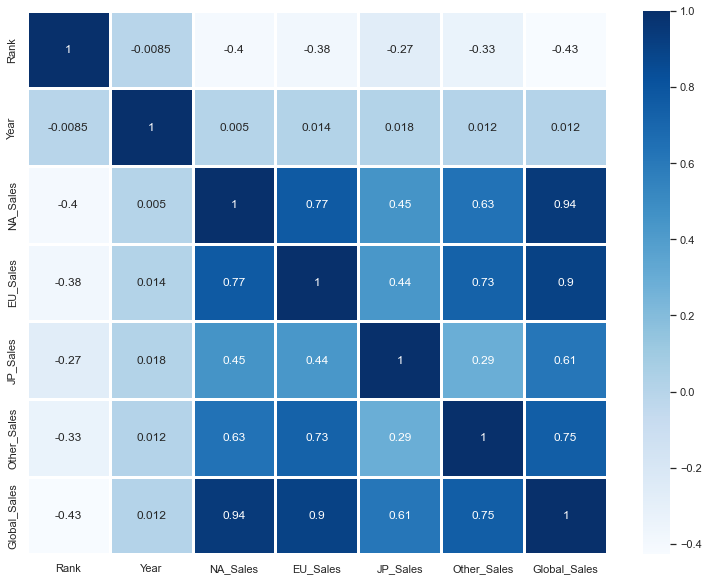

In [40]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)